In [16]:
import pandas as pd

df = pd.read_csv('upload_DJIA_table.csv')
df['Delta'] = df.Open - df.Close
df

,Date,Open,High,Low,Close,Volume,Adj Close,Delta
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-25.128907
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,-217.230468
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,-238.660157
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,-219.210937
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,214.970704
...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,-83.859376
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,99.849609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,139.230468
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,-52.679687


In [12]:
df1 = pd.read_csv('RedditNews.csv')
df1

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...
...,...,...
73603,2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...
73604,2008-06-08,b'Threat of world AIDS pandemic among heterose...
73605,2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...
73606,2008-06-08,"b""UK: Identity cards 'could be used to spy on ..."


In [33]:
df2 = pd.read_csv('Combined_News_DJIA.csv')
df2['Delta'] = df.Open - df.Close
dff = pd.DataFrame({'Date':df2.Date, 'Label':df2.Label, 'Delta':df2.Delta})
dff

,Date,Label,Delta
0,2008-08-08,0,-25.128907
1,2008-08-11,1,-217.230468
2,2008-08-12,0,-238.660157
3,2008-08-13,0,-219.210937
4,2008-08-14,1,214.970704
...,...,...,...
1984,2016-06-27,0,-83.859376
1985,2016-06-28,1,99.849609
1986,2016-06-29,1,139.230468
1987,2016-06-30,1,-52.679687


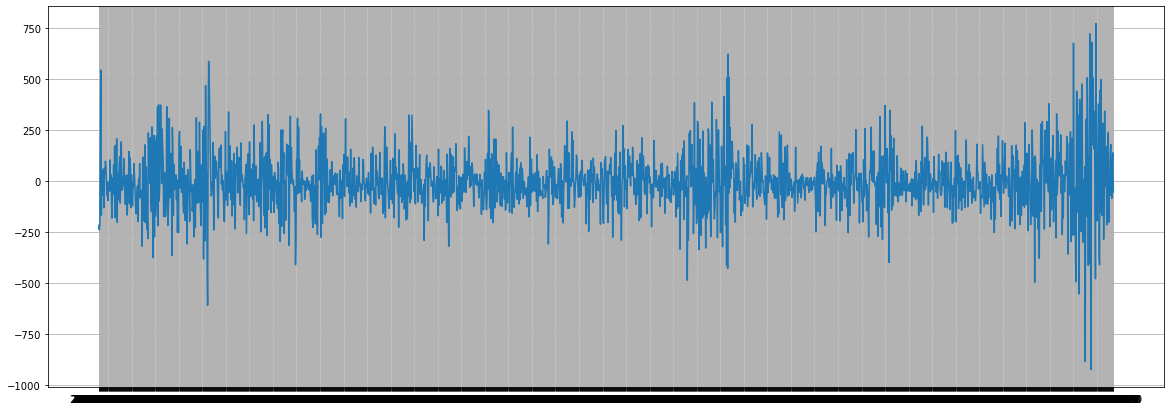

In [37]:
#import matplotlib as plt
import plotly.express as px
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools 
import warnings
xs12 = dff[(dff.Date > "2008-08-08") & (dff.Date < "2016-07-01")].Date
ys12 = dff[(dff.Date > "2008-08-08")  & (dff.Date < "2016-07-01")].Delta
data11 = dff[(dff.Date > "2008-08-08") & (dff.Date < "2016-07-01")]
plt.figure(figsize=(20,7))
plt.plot(xs12, ys12)
plt.grid(True)
plt.show()

In [116]:
tryw = pd.DataFrame(np.array(ys12), index=range(len(xs12)))
model = SARIMAX(tryw)
model_fit = model.fit(disp=False)
yhat = model_fit.predict(0, len(ys12))
model_fit.aic,len(yhat)

(25302.015087731124, 1988)

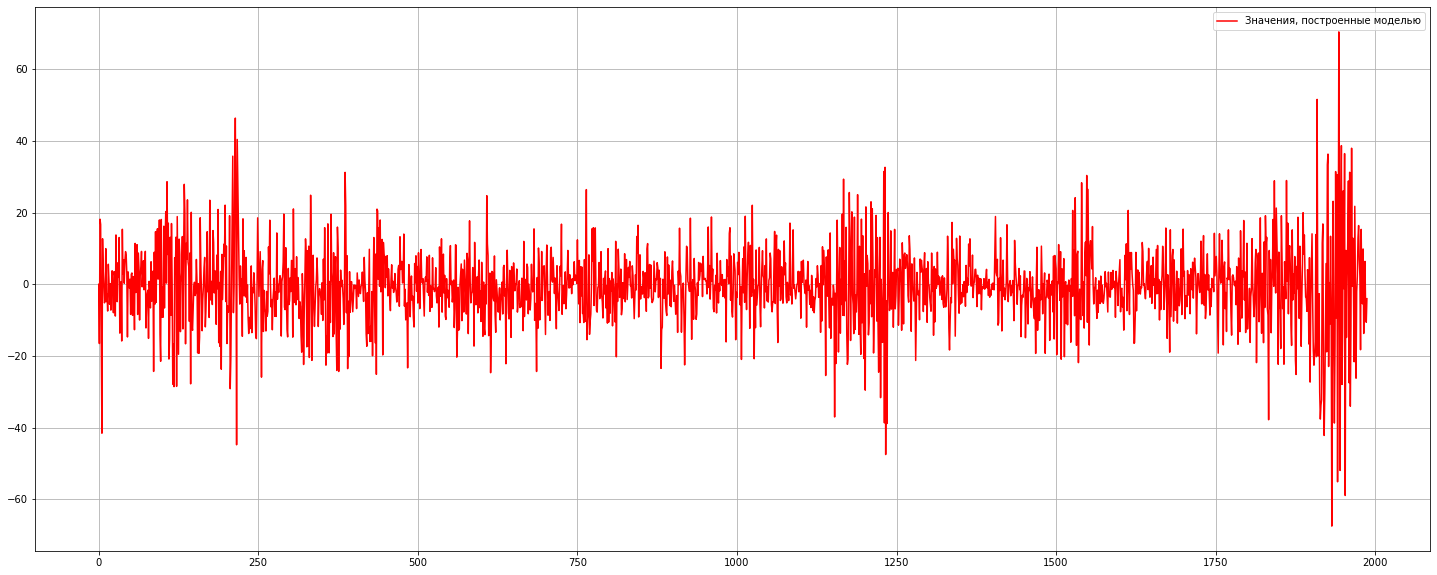

In [67]:
plt.figure(figsize=(25, 10))
#plt.scatter(range(len(dff[(dff.Date > "2008-08-08")  & (dff.Date < "2016-07-01")].Date)), dff[(dff.Date > "2008-08-08")  & (dff.Date < "2016-07-01")].Delta, c='b', label='Заданные значения')
plt.plot(yhat, c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [188]:
lb = dff.Label
b = []
for i in range(0, len(yhat)):
    if lb[i] == 0 and yhat[i] < 0:
        a = yhat[i]*(-1)
        b.append(a)
    elif lb[i] == 1 and yhat[i] > 0:
        a = yhat[i]*(-1)
        b.append(a)
    else:
        a = yhat[i]
        b.append(a)
dr = pd.DataFrame({'Date':df2.Date[:-1], 'Label':lb[:-1], 'Delta':b})
dr.head(1000)
len(lb)
len(dff.Date)
dr

,Date,Label,Delta
0,2008-08-08,0,0.000000
1,2008-08-11,1,-16.548046
2,2008-08-12,0,18.180504
3,2008-08-13,0,16.698913
4,2008-08-14,1,-16.375903
...,...,...,...
1983,2016-06-24,0,3.709109
1984,2016-06-27,0,6.388187
1985,2016-06-28,1,-7.606281
1986,2016-06-29,1,-10.606211


In [213]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

df12 = pd.read_csv('Combined_News_DJIA.csv')
train = df12[df12['Date']<'20150101']
test = df12[df12['Date'] > '20141231']
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
for index in new_Index:
    data[index] = data[index].str.lower()
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))
countVector = CountVectorizer(ngram_range=(2,2))
trainDataset = countVector.fit_transform(headlines)
def pred_cl(df):
    data = df.iloc[:, 2:27]
    data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    list1 = [i for i in range(25)]
    new_Index = [str(i) for i in list1]
    data.columns = new_Index
    for index in new_Index:
        data[index] = data[index].str.lower()
    headlines = []
    for row in range(0, len(data.index)):
        headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))
    Dataset = countVector.transform(headlines)
    return Dataset
predictor_df = pred_cl(df12)
with open('D:\\rf_b.pkl', 'rb') as f:
    randomClassifier = pickle.load(f)
    ch = randomClassifier.predict(predictor_df)
    
dfff = pd.read_csv('upload_DJIA_table.csv')
dfff['Delta'] = dfff.Open - dfff.Close
dff = pd.DataFrame({'Date':df2.Date[:-1], 'Label':ch[:-1], 'Delta':b})
dff

,Date,Label,Delta
0,2008-08-08,0,0.000000
1,2008-08-11,1,-16.548046
2,2008-08-12,0,18.180504
3,2008-08-13,0,16.698913
4,2008-08-14,1,-16.375903
...,...,...,...
1983,2016-06-24,1,3.709109
1984,2016-06-27,1,6.388187
1985,2016-06-28,1,-7.606281
1986,2016-06-29,1,-10.606211


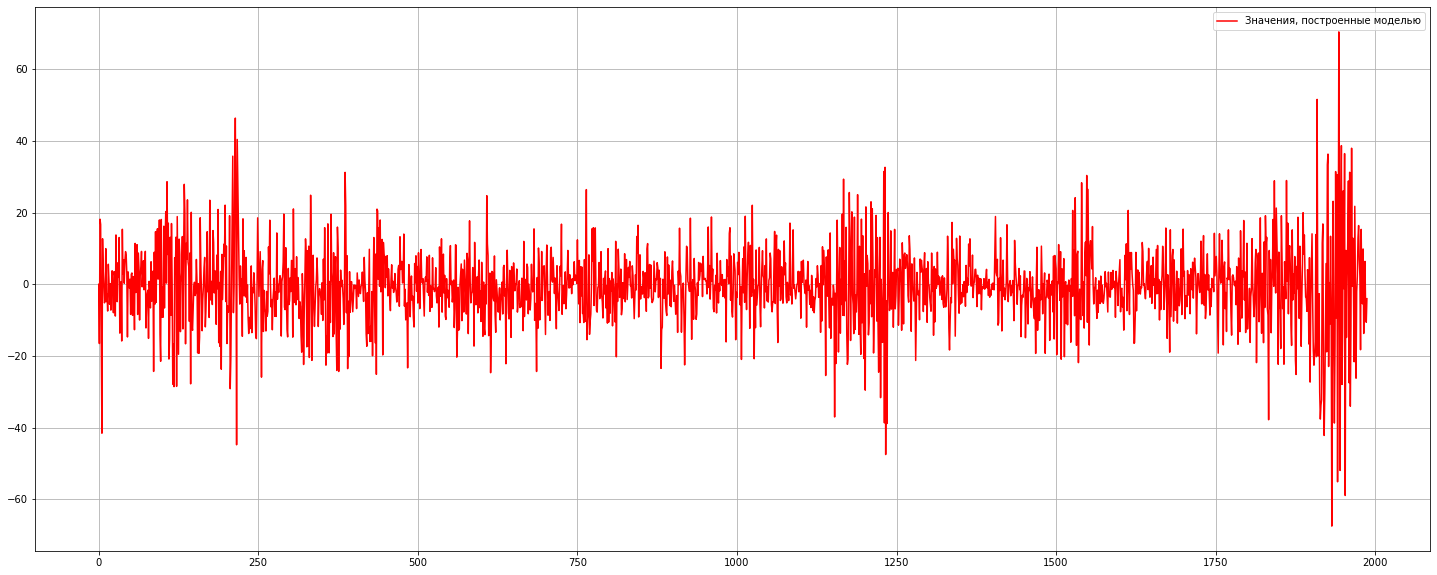

In [91]:
plt.figure(figsize=(25, 10))
#plt.scatter(range(len(dff[(dff.Date > "2008-08-08")  & (dff.Date < "2016-07-01")].Date)), dff[(dff.Date > "2008-08-08")  & (dff.Date < "2016-07-01")].Delta, c='b', label='Заданные значения')
plt.plot(b, c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()

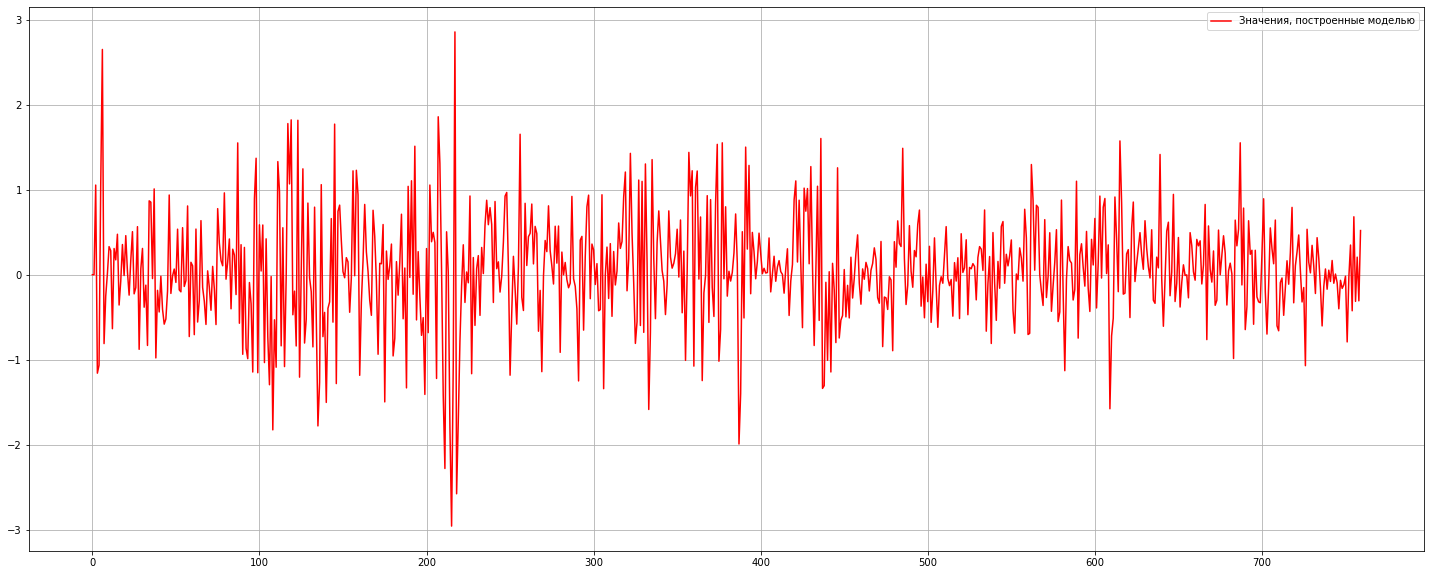

,Date,Delta
0,30/06/2016,0.000000
1,01/07/2016,0.000000
2,02/07/2016,1.054262
3,03/07/2016,-1.158264
4,04/07/2016,-1.063873
...,...,...
754,24/07/2018,-0.424512
755,25/07/2018,0.681291
756,26/07/2018,-0.313709
757,27/07/2018,0.206502


In [249]:
import datetime as DT
import pandas as pd
a = '2016.6.30'
a = a.split('.')
a1 = int(a[0])
a2 = int(a[1])
a3 = int(a[2])
start_date = DT.datetime(a1, a2, a3)
end_date = DT.datetime(2018, 7, 28)

data_pred = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%d/%m/%Y').tolist()
data_pred
tryw = pd.DataFrame(np.array(dff.Delta), index=range(len(dff.Date)))
model = SARIMAX(tryw)
model_fit = model.fit(disp=False)
yhat_pr = model_fit.predict(0, len(data_pred))
model_fit.aic,len(yhat_pr)
plt.figure(figsize=(25, 10))
plt.plot(yhat_pr, c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()
drr = pd.DataFrame({'Date':data_pred, 'Delta':yhat_pr[:-1]})
drr

In [214]:
#stop_words = nltk.corpus.stopwords.words('english')
#import pymorphy2
#import pandas as pd
#import nltk
##from nltk.corpus import stopwords
#from sklearn.feature_extraction.text import TfidfVectorizer
#morph = pymorphy2.MorphAnalyzer()
#stop_words = stopwords.words('english')
#def lemmatize(text):
#    words = text.split()
#    res = list()
#    for word in words:
#        p = morph.parse(word)[0]
#        res.append(p.normal_form)
#    res = [word for word in res if word not in stop_words]
#    return res
#train = df2[df2['Date']<'2015-01-01']
#test = df2[df2['Date'] > '2014-12-31']
#def pre_text(df):
#    data = df.iloc[:, 2:27]
#    data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
#    list1 = [i for i in range(25)]
#    new_Index = [str(i) for i in list1]
#    data.columns = new_Index
#    for index in new_Index:
#        data[index] = data[index].str.lower()
#    headlines = []
#    for row in range(0, len(data.index)):
#        ch = data.iloc[row, 0:25]
#        headlines.append(' '.join(str(x) for x in ch))
#    headlines[0]
#    he = []
#    for i in headlines:
#        he.append(lemmatize(i))
#    hea = []
#    for i in he:
# #       for j in i:
#            if j == 'b':
#                ind = i.index(j)
#                del i[ind]
#        hea.append(' '.join(str(x) for x in i))
#    return hea
#hea = pre_text(train)
#hea1 = pre_text(test)